In [2]:
import os

import numpy as np
import pandas as pd

In [4]:
sample_submissions = pd.read_csv('sample_submission.csv.zip')

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'embeddings.zip',
 'train.csv.zip',
 'eda1.ipynb',
 'sample_submission.csv.zip',
 'test.csv.zip']

In [5]:
sample_submissions.head()

,qid,prediction
0,00014894849d00ba98a9,0
1,000156468431f09b3cae,0
2,000227734433360e1aae,0
3,0005e06fbe3045bd2a92,0
4,00068a0f7f41f50fc399,0


In [7]:
train_all = pd.read_csv('train.csv.zip')

In [8]:
test_all = pd.read_csv('test.csv.zip')

In [9]:
len(train_all)

1306122

In [10]:
len(test_all)

56370

In [15]:
len(train_all[train_all.target == 1])

80810

In [62]:
(train_all.target == 1).sum() / len(train_all)

0.06187017751787352

In [52]:
bad_unigrams = {
    'kill', 'killed', 'killing', 'fuck', 'fucking', 'penis', 'penises', 'skin', 'races', 'racism', 'racist',
    'gay', 'lesbian', 'di**', 'sex', ''
}

bad_bigrams = {
    ('have', 'sex')
}

# political terms
# country names
# races
# シモネタ

In [56]:
train_all = train_all.assign(question_len=train_all.question_text.str.len())

In [58]:
import seaborn as sns

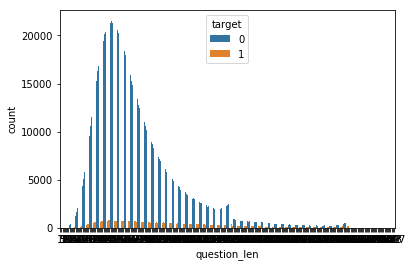

In [61]:
sns.countplot(train_all.question_len, hue=train_all.target)

In [51]:
train_all[train_all.target == 1].question_text.head(50).tolist()

['Has the United States become the largest dictatorship in the world?',
 'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
 "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
 'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
 'Which races have the smallest penis?',
 'Why do females find penises ugly?',
 'How do I marry an American woman for a Green Card? How much do they charge?',
 "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
 'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
 "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually restricted the ability of states to make their own laws?",
 '

In [16]:
80810.0 / 1306122

0.06187017751787352

In [36]:
ends_with_q = train_all.question_text.str.split().map(lambda x: x[-1][-1] != '?')

In [38]:
train_all.ends_with_q = ends_with_q

/usr/local/google/home/maekawa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [39]:
train_all[train_all.ends_with_q].head()

,qid,question_text,target
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
80,0003888b6173d1b67eda,How do I change the owner of a current YouTube...,0
130,00060eef307e44d35aa7,"But, why did George Washington free his slaves...",0
302,000e67648fce55f011be,Why do the Liberals who run schools choose not...,1
366,001114dd925872729b57,Which are the best trusted sites for applying ...,0


In [41]:
train_all.loc[302].question_text

'Why do the Liberals who run schools choose not to have controlled access? The kids in Florida were killed due to an unlocked door.'

In [42]:
bad_terms = {
    'kill', 'killed', 'killing', 'fuck', 'fucking', 'penis', 'skin', 'races', 'racism', 'racist',
}

In [43]:
train_all[train_all.question_text.any() str.contains(bad_terms)].head()

TypeError: unhashable type: 'set'

In [47]:
train_all.question_text.any?